# Keras Regression Code Along Project 

The goal of this project is to perform exploratory data analysis and preprocessing of data in order to build a model. We are using keras regression to predict the King County house prices based on the house's features.

## The Data

I will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### Importing visualization libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kc_house_data = pd.read_csv('../data/kc_house_data.csv')

# Exploratory Data Analysis

* Checking for null and NaN values in a dataset

In [3]:
kc_house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
kc_house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## First insights for prices of the houses 

<AxesSubplot:xlabel='price', ylabel='Count'>

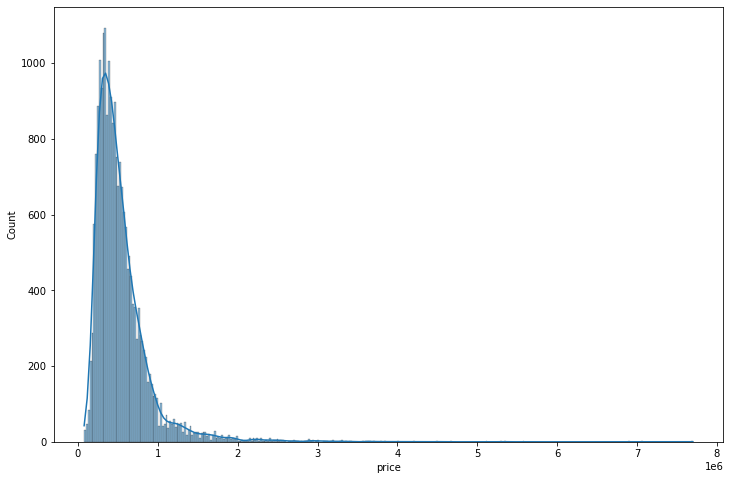

In [5]:
plt.figure(figsize = (12,8))
sns.histplot(kc_house_data['price'], kde = True)

*As we can clearly see, there are outliers that can affect the model. Initially, we will include the outliers in our model and then not.*

## Correlation between features and house’s price

In [6]:
kc_house_data.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

#### Let's visualize some of them

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

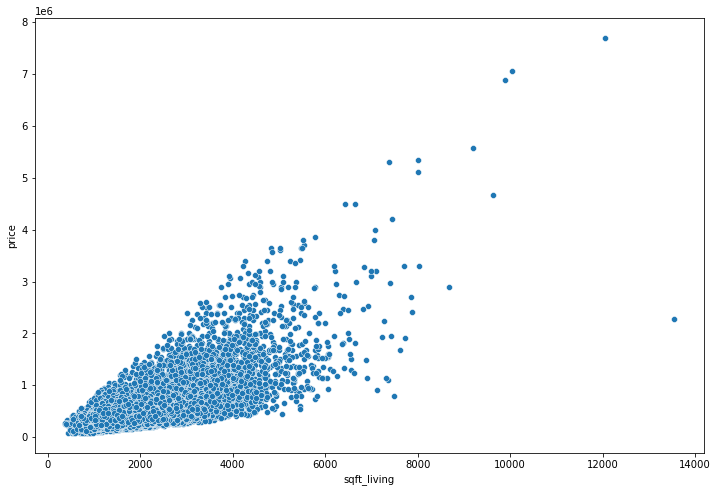

In [7]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'sqft_living', y = 'price', data = kc_house_data)

*We can notice strong correlation between price and sqft_living*

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

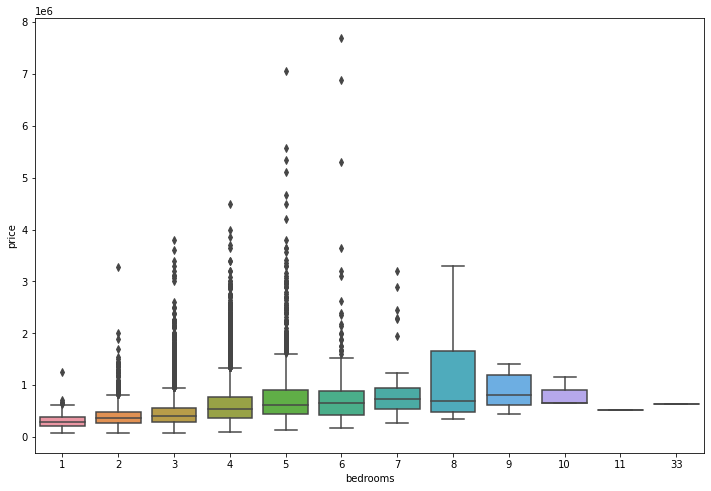

In [8]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'bedrooms', y = 'price', data = kc_house_data)

### Geographical properties

<AxesSubplot:xlabel='long', ylabel='price'>

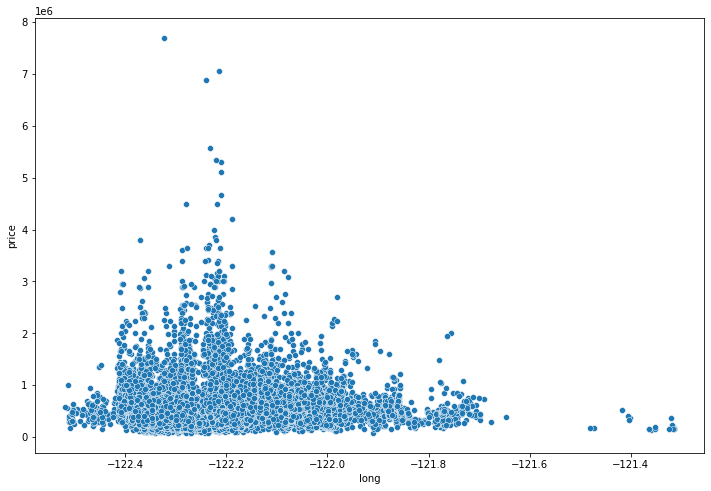

In [9]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long', y = 'price', data = kc_house_data)

In [10]:
kc_house_data.corr()['price'].sort_values()['long']

0.022036321104619574

*There is no correlation between them (0.02), so we should see a straight line. However, we can see that there is a correlation as we can see from long -122.2 that house prices are increasing.*

<AxesSubplot:xlabel='lat', ylabel='price'>

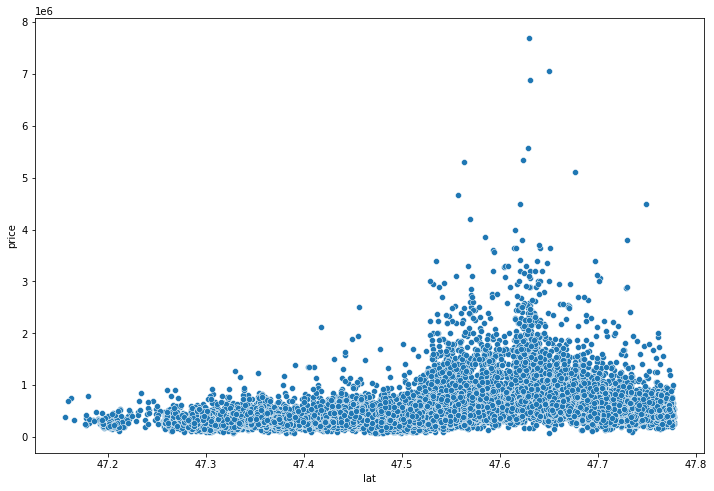

In [11]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'lat', y = 'price', data = kc_house_data)

In [12]:
kc_house_data.corr()['price'].sort_values()['lat']

0.3066923142476349

### Let's plot long vs lat to get King County map and compare to:

https://www.seattlebikeblog.com/wp-content/uploads/2011/06/Screen-shot-2011-06-10-at-11.16.24-AM.png

<AxesSubplot:xlabel='long', ylabel='lat'>

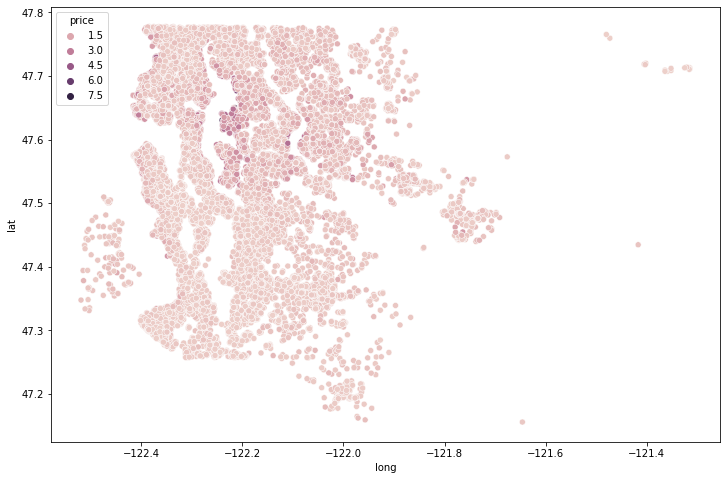

In [13]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long', y = 'lat', data = kc_house_data, hue = 'price')

In [14]:
kc_house_data.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


*We can see the outliers of prices*

In [15]:
out_ratio = (len(kc_house_data)-216)/len(kc_house_data)
out_ratio

0.9899986109181831

*With the original dataset, we would be 1% off if we didn't include the 200 most expensive houses.*

In [16]:
non_top_01_perc = kc_house_data.sort_values('price', ascending = False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

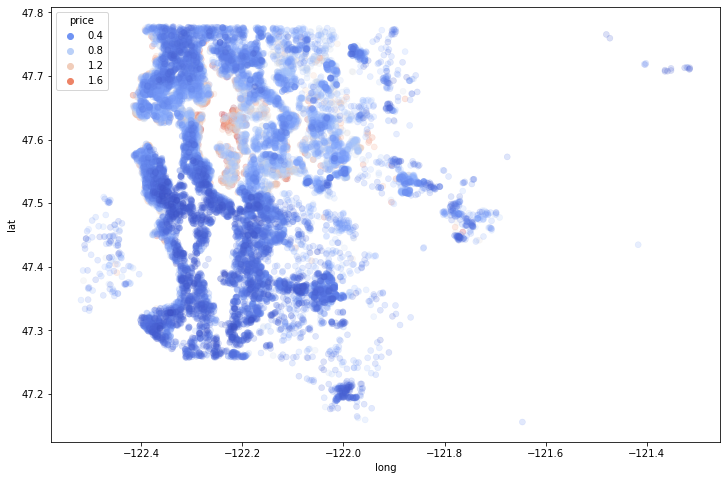

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_01_perc,hue='price',
                edgecolor=None,alpha=0.2, palette = 'coolwarm')

*Plotting the prices versus waterfront allows us to see clearly that more expensive houses are near the lake of Washington.*

<AxesSubplot:xlabel='waterfront', ylabel='price'>

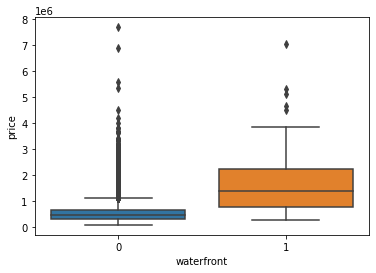

In [18]:
sns.boxplot(x = 'waterfront', y = 'price', data = kc_house_data)

# Processing of the Data

In [19]:
kc_house_data.head(3).transpose()

,0,1,2
id,7129300520,6414100192,5631500400
date,10/13/2014,12/9/2014,2/25/2015
price,221900.0,538000.0,180000.0
bedrooms,3,3,2
bathrooms,1.0,2.25,1.0
sqft_living,1180,2570,770
sqft_lot,5650,7242,10000
floors,1.0,2.0,1.0
waterfront,0,0,0
view,0,0,0


*For modeling our data id is not needed.*

In [20]:
kc_house_data = kc_house_data.drop('id', axis = 1)

In [21]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

*Type of Date column is an object. We'll use the datetime format now.*

In [22]:
kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])

In [23]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

*Let's focus on month and year*

In [24]:
kc_house_data['month'] = kc_house_data['date'].apply(lambda date: date.month)

In [25]:
kc_house_data['year'] = kc_house_data['date'].apply(lambda date: date.year)

In [26]:
kc_house_data = kc_house_data.drop('date', axis = 1)

In [27]:
kc_house_data.head(3).transpose()

,0,1,2
price,221900.0000,538000.000,180000.0000
bedrooms,3.0000,3.000,2.0000
bathrooms,1.0000,2.250,1.0000
sqft_living,1180.0000,2570.000,770.0000
sqft_lot,5650.0000,7242.000,10000.0000
floors,1.0000,2.000,1.0000
waterfront,0.0000,0.000,0.0000
view,0.0000,0.000,0.0000
condition,3.0000,3.000,3.0000
grade,7.0000,7.000,6.0000


*Zipcode doesn't behave in a tedious manner. We will drop zipcode as it requires further analysis to include it in the model.*

In [28]:
kc_house_data = kc_house_data.drop('zipcode', axis = 1)

In [29]:
kc_house_data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

*There are 0 values for year of renovation which means that house was not renovated. We will replace these values with year built.*

In [30]:
def func(yr_renovated,yr_built):
    if yr_renovated == 0:
        return yr_built
    else:
        return yr_renovated

In [31]:
kc_house_data['yr_renovated-built'] = kc_house_data.apply(
    lambda x: func(x.yr_renovated, x.yr_built), axis = 1)

In [32]:
kc_house_data.head(3).transpose()

,0,1,2
price,221900.0000,538000.000,180000.0000
bedrooms,3.0000,3.000,2.0000
bathrooms,1.0000,2.250,1.0000
sqft_living,1180.0000,2570.000,770.0000
sqft_lot,5650.0000,7242.000,10000.0000
floors,1.0000,2.000,1.0000
waterfront,0.0000,0.000,0.0000
view,0.0000,0.000,0.0000
condition,3.0000,3.000,3.0000
grade,7.0000,7.000,6.0000


In [33]:
kc_house_data['yr_renovated-built'].value_counts()

2014.0    650
2005.0    485
2006.0    477
2004.0    459
2003.0    455
         ... 
1901.0     28
1902.0     25
1933.0     23
1935.0     19
1934.0     14
Name: yr_renovated-built, Length: 116, dtype: int64

*Let's drop now yr_built and yr_renovated*

In [34]:
kc_house_data = kc_house_data.drop('yr_built', axis = 1)
kc_house_data = kc_house_data.drop('yr_renovated', axis = 1)

In [35]:
kc_house_data.head(3).transpose()

,0,1,2
price,221900.0000,538000.000,180000.0000
bedrooms,3.0000,3.000,2.0000
bathrooms,1.0000,2.250,1.0000
sqft_living,1180.0000,2570.000,770.0000
sqft_lot,5650.0000,7242.000,10000.0000
floors,1.0000,2.000,1.0000
waterfront,0.0000,0.000,0.0000
view,0.0000,0.000,0.0000
condition,3.0000,3.000,3.0000
grade,7.0000,7.000,6.0000


# We are ready to model our Data

## Scaling and Train Test Split

In [36]:
X = kc_house_data.drop('price',axis=1)
y = kc_house_data['price']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train= scaler.fit_transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

# Creating Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [44]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Traing Model

In [45]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, verbose = 0)

*Let's define errors and plot them*

In [46]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

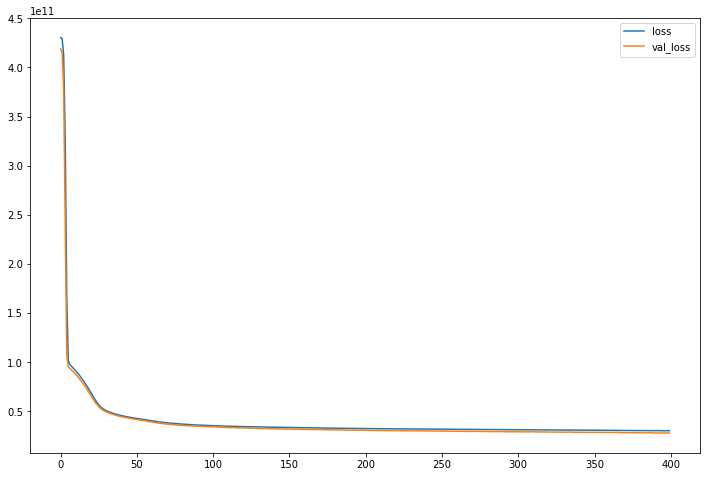

In [47]:
losses.plot(figsize = (12,8))

# Evaluation on Test Data

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [49]:
predictions = model.predict(X_test)

In [50]:
mean_absolute_error(y_test,predictions)

102672.07247781636

In [51]:
np.sqrt(mean_squared_error(y_test,predictions))

167503.64290167816

In [52]:
explained_variance_score(y_test,predictions)

0.7884492843828086

In [53]:
kc_house_data['price'].mean()

540296.5735055795

In [54]:
kc_house_data['price'].median()

450000.0

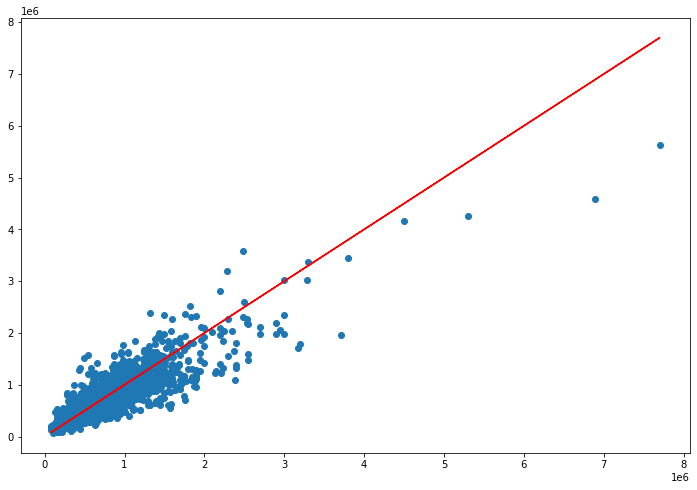

In [55]:
plt.figure(figsize = (12,8))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

*We can see that our model does not fit our data so well. We will limit our data by not including outliers.*

In [56]:
n_outliers = kc_house_data.sort_values('price', ascending = False).iloc[216:]

In [57]:
n_outliers.sort_values('price', ascending = False).head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month,year,yr_renovated-built
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,47.5876,-122.204,2960,10347,6,2014,2003.0
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,47.6422,-122.157,3900,35237,4,2015,1998.0
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,47.7165,-122.259,2630,13868,4,2015,1963.0
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,47.5632,-122.215,3700,14486,10,2014,1988.0
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,47.5287,-122.220,3730,16560,2,2015,1960.0
15363,1950000.0,4,2.50,3440,14554,2.0,1,4,3,8,2170,1270,47.7364,-122.286,3170,11810,4,2015,2012.0
16238,1950000.0,3,2.50,2510,12779,1.5,0,4,3,10,2510,0,47.6982,-122.231,2810,12225,10,2014,1968.0
18860,1950000.0,4,4.00,4690,6900,2.0,0,0,3,11,3480,1210,47.6165,-122.216,2800,11240,12,2014,2001.0
14241,1950000.0,4,3.75,4150,17424,1.0,0,0,3,9,3130,1020,47.6390,-122.236,3930,21420,3,2015,2000.0
556,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,47.5666,-122.231,3230,20697,6,2014,2003.0


In [58]:
X = n_outliers.drop('price',axis=1)
y = n_outliers['price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [60]:
scaler = MinMaxScaler()

In [61]:
X_train= scaler.fit_transform(X_train)

In [62]:
X_test = scaler.transform(X_test)

In [63]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [64]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, verbose = 0)

In [65]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

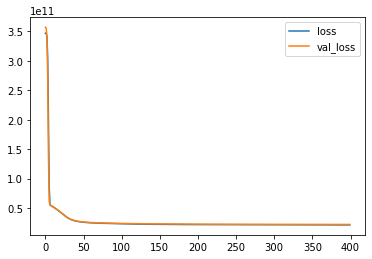

In [66]:
losses.plot()

In [67]:
predictions = model.predict(X_test)

In [68]:
mean_absolute_error(y_test,predictions)

98855.45057360678

In [69]:
np.sqrt(mean_squared_error(y_test,predictions))

148785.58159603595

In [70]:
(167976.7146165662-np.sqrt(mean_squared_error(y_test,predictions)))/np.sqrt(mean_squared_error(y_test,predictions))

0.12898516653741102

*The mean squared error was reduced by 14%. We assume that our model works best for houses with a maximum price of three million dollars. For prices more than 3 million our model does not fit these data so well.*